# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
N = 500
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

In [4]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
      random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
      if random_beta > max_random:
        max_random = random_beta
        ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
      number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
      number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

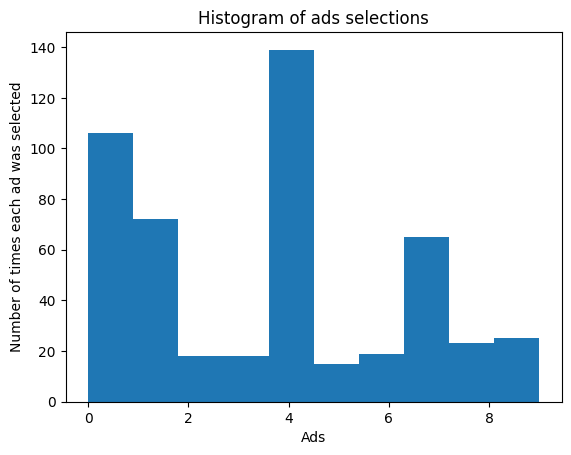

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()